## Learning objectives
- Describe the difference  between a variable and  set of observations
- Understand concept of probability in terms of predicting future data
- Generate data from a model and compare to real data to assess the model.

In [5]:
import pandas as pd
import seaborn as sns
geno = pd.read_table("../data/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pmap = pd.read_table("../data/arabmagic/arabmagic_pmap_tair9.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("../data/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)
counts = pd.read_table("../data/eco_data/species_counts.txt")
sites = pd.read_table("../data/eco_data/eco_sites.txt")

fruit_length_geno = pd.read_table("../data/arabmagic/fruit_length_geno.csv",sep=",",index_col=0)
gwas_plus_pmap = pd.read_table("../data/arabmagic/gwas_plus_pmap.csv",sep=",",index_col=0)

## 2. Introducing types of variables

I already mentioned another word for a feature is a variable.

While variables in programming are placeholders for specific values, the word is taken from statistics or math where a variable is a placeholder for a number that can take on certain values. 

In algebra you learned something like $ y = m \times x + b $ where $x$ and $y$ are variables. This is the same idea! But in most data our variables cannot take on any values like they can in math. The values they can take on are related to real world things (like fruit lengths, bolting days...)

By gathering **observations** we are learning about these **variables**. In the end we don't care about the particular 677 plants, we only care about the biology of how genotype shapes phenotype.

**Exercise 2.1**: Let's say we got 400 **new** plants. What do you expect to see when you look at the data for these new plants on MASC06116 and fruit_length? (feel free to make the plots again)

## 400 New Plants, what would we see for MASC06116 and fruit length?
- A genotype results in longer fruit lengths than B genotype
- Genotype for MASC06116 can only be A or B
- Fruit lengths would likely be in a similar range as before (somewhere between 9 and 20)


**Exercise 2.2**: For each of the following variables, describe:

- Minimum value (if any)
- Maximum value (if any)
- One kind of value that is not valid
    
A. `Columba_pulchricollis` (counts data frame):
    
B. `MN5_26437895` (geno data frame)

C. `fruit_length` (pheno data frame)

**Exercise 2.3**: Create a histogram (distribution plot) for fruit_length and for MASC06116. Describe what is similar and what different about the axes and other characteristics of these two plots. 

In [11]:
print(counts['Columba_pulchricollis'].describe()) # Invalid data 'B' or '1.2'
print(geno.loc['MN5_26437895',:].describe()) # Invalid data '1'
print(pheno['fruit_length'].describe()) # Invalid data 200

count    38.000000
mean      0.052632
std       0.324443
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: Columba_pulchricollis, dtype: float64
count     702
unique      3
top         A
freq      415
Name: MN5_26437895, dtype: object
count    674.000000
mean      14.941395
std        1.794643
min        8.790000
25%       13.802500
50%       14.950000
75%       16.107500
max       19.940000
Name: fruit_length, dtype: float64


**Exercise 2.4**: Use the `describe` function on both features. How is the result of `describe` different between the 2? Compare the results to the histogram you just made. 

A **distribution** describes how commonly different values of a feature are. 

For numbers, they are often a "bell curve" (no relation to the book), such as things like:
- total number of birds in a forest
- fruit length
- human height
 
Sometimes they are not a bell curve but have other shapes, but the bell curve is very common because, intuitively, many variables have a "very common" value, a "somewhat common but high" and "somewhat common but low" value. Also, many variables have roughly symmetric likelihood fof seeing aa value.

**Exercise 2.5**: Describe what is a "very common", "somewhat common but high", and "very high" value for fruit length

**Exercise 2.6**: If you got a new plant at random, what do you think is the approximate chance the  plant's genotype at  MASC06116  will be an A?

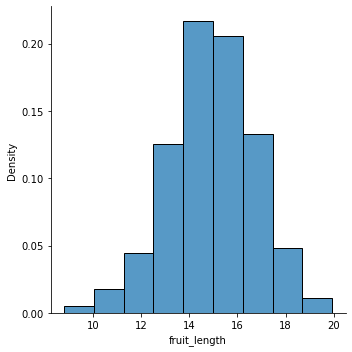

In [15]:
sns.displot(data=fruit_length_geno, x="fruit_length", stat='density',bins=9)

## 3 Probability
Probability is simply the **fraction of the time we expect to see a new observation take on a certain value** for a feature (variable) (How probable is it) if we collected more data.

In this case, if we got another Arabidopsis similar to the ones we already have.

We measure probability from zero (impossible) to 1 (definitely expect). For example, with a coin flip, the probability of heads is 0.5.

**Exercise 3.1**: Using no coding but just the plots/info above, give **approximate** answers to these questions in groups:
- What is the probability of MASC06116 = A?
- What is the probability of MASC06116 = B?
- What is the probability of MASC06116 = C?
- What is the probability of fruit_length between 14 and 16?
- What is the probability of fruit_length between 10 and 12?
- What is the probability of fruit_length > 30?
- What is the probability of fruit_length < 100?

Remember we can convert a distribution of **frequencies** (counts) to a distribution of **densities** by dividing by the total number of plants:

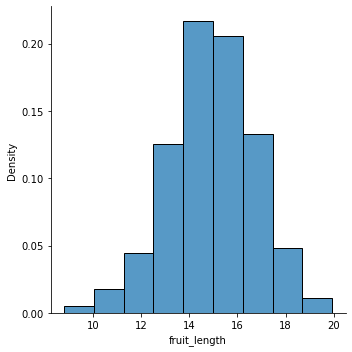

In [13]:
sns.displot(data=pheno, x="fruit_length",stat='density',bins=9)

The density of the bin from 14 to 14.4 is about 0.2, we can estimate about 0.2 (20%) is the fraction of future plants that would have fruit_length in that bin.

**Exercise 3.2 Discuss**: what is the difference between a density (fraction of plants) and a probability?

## 4 Statistics
Statistics are numbers that summarize a distribution.

**Discuss**: Where have we seen a number summary of a distribution?

The type of distribution determines the relevant statistics.

### 4.1 Statistics of binary/boolean
(For the purpose of this discussion, we will consider all markers to be A or not-A. This is common in genetics analysis, usually "Reference" or "Alternate")

For a binary variable like the marker, the distribution is determined only by the fraction of time the variable is .

In [ ]:
geno.loc['MASC06116'].describe()

In [ ]:
geno.transpose().groupby('MASC06116').size()

### 4.2 Statistics of a number variable
For a number variable like fruit length, the key numbers include the **mean** (where is the peak) and the **standard deviation** (how wide is it around the peak).

Look at this plot again, where we divided up the plants by genotype:

In [ ]:
sns.displot(data=fruit_length_geno, x="fruit_length", hue='MASC06116',stat='density',common_norm=False, kde=True)

**Exercise 4.2.1**: Run `describe` on fruit lengths divided by genotype at MASC06116. Combining this info and the plot above, what is the difference between the distributions of fruit lengths?

## 5. Why model??
So far, we've only had a kind of visual intuition that there seems to be a difference between the fruits of the 2 genotypes but we don't really have any way to automatically discover this kind of thing.

we're forming a hypothesis and a model in our head when we predict that future plants will look like these 700 plants

But to quantify whether this model is true (to test this hypothesis) rather than just eyeballing it, we come up with *model*.

One strategy is conceptually, to use the model to generate data, and then see how similar the actual data is to the generated data.

But before we get into modeling with two features, let's keep it simple and model data on one feature.

## 5.1 Model binary data with different probabilities
Let's model binary data first as it is a bit simpler. 

Examples of when you would want to model binary data. You want to test your estimate of:
- whether or not a wildfire happens in a given year in a given place
- whether a disease occurs in a person
- whether pandas reproduce or not

We'll create 2 hypotheses for what genotype data for MASC06116 will look like:

**Hypothesis I:** we model with probability that genotype = A is 0.4
**Hypothesis II:** similar but we pick p= 0.9 as probability of a plant having genotype A

**Discuss**: What does it mean if we pick p = 0? p = 1? p = 0.5?

First I'll convert the marker info into 0 and 1 to make it binary:

In [ ]:
marker_info = (fruit_length_geno['MASC06116']== 'A').astype(int)
marker_info.describe()

**Discuss**: How does the binary version of this marker data relate to the 'A' vs 'B' version we had before?

We can **generate data that follows our hypothesis** using the **Bernoulli** model. This models any binary (0 or 1) variable. 

Once you have your model, you can generate data from the model and see how similar the generated data is to the real data.

Models require input **parameters** that describe their distributions. The only input parameter here is the probability of getting a 1 rather than a zero.

We can use the `bernoulli` function from the `scipy.stats` package to make our model and generate data from it. You need to supply it `p`, the probability of getting 1 rather than 0 and it will generate one data point: 

In [1]:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.4)

0

You can also give it a `size`, how many observations we want to generate:

In [2]:
bernoulli.rvs(p=0.4, size = 10)

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [3]:
bernoulli.rvs(p=0.9, size = 10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
pd.Series(bernoulli.rvs(p=0.4, size = 10)).describe()

count    10.000000
mean      0.400000
std       0.516398
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
dtype: float64

**Exercise 5.1.1**: Generate as many observations as there are plants in our data, and save that in a variable.

In [8]:
dist = pd.Series(bernoulli.rvs(p=0.9, size=703))

**Exercise 5.1.2**: Get the number of times across the set of generated observations that there is a 1 rather than 0

KeyError: '0'

**Exercise 5.1.3**: Get the number of times marker MASC06116 == "A" (1 = it is A, 0 = not-A) and get the difference between the number in the generated and real data.

**Exercise 5.1.4**: Make 3 separate histograms: one for the real data, one for the generated data from 5.1.1, and one for generating data with p=0.9.

The idea is, some models are *better* than other models in terms of how similar they are to our actual data. We compare our data to the models in order to decide which model is the best.

**Exercise 5.1.5**: Create 10 evenly spaced values of p (probability of a 1 rather than 0) spaced out from 0 (never get a 1) to 1 (always get a 1). For each of these values, get the difference between the number of 1's in the generated data and in the real data. Save this into a data frame. Plot on the x-axis "p" and on the y-axis the difference.

**Exercise 5.1.6**: Find the best value based on the smallest difference above in exercise 5.1.5. Generate the genotypes of plants from this model and plot the histogram, and compare it to the real data histogram and the other histograms form 5.1.4

#### Compare the real data to the models
Which model, I or II is most similar to the real data?